<a href="https://colab.research.google.com/github/jahyng/COGS108_Repo/blob/main/cogs_108_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm
from scipy.stats import ttest_ind, chisquare, normaltest
from statsmodels.formula.api import ols

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 5-Minute Crafts (1).csv to 5-Minute Crafts (1).csv


In [ ]:

# Get the file name of the uploaded CSV
five_minute = list(uploaded.keys())[0]

# Read the CSV data into a DataFrame
df = pd.read_csv(five_minute)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Display the first few rows of the DataFrame
print(df.head())

# Check the dimensions of the DataFrame
print(df.shape)

# Get an overview of the data types and missing values
print(df.info())

# Get summary statistics of the numerical columns
print(df.describe())

        video_id                                              title  \
0  v=XHTofu5wbbM  SUPER LAZY LIFE HACKS || Cool Hacks To Make Yo...   
1  v=HGxx0umIQvk  YUM! EASY SMART FOOD HACKS || Tasty Recipes Fo...   
2  v=Tt4RMk3Ih04                  HELPFUL LIFE HACKS FOR YOUR HOUSE   
3  v=A2MTydM5e58  USEFUL HACKS FOR YOUR HOME || Simple Tips That...   
4  v=_halJ4yrmGQ  ARE YOU A CRAFTY MOM? Amazing Parenting Hacks ...   

   active_since_days  duration_seconds  total_views  num_chars  num_words  \
0                 22               623       295614         60         12   
1                  1               739       130544         87         17   
2                  1               960        17834         33          6   
3                 30               833      3128867         66         12   
4                 15              3600      4210362         56         10   

   num_punctuation  num_words_uppercase  num_words_lowercase  num_stopwords  \
0                2             

In [ ]:
#Check for missing values
missing_values = df.isnull().sum()

#Check for duplicate rows
duplicates = df.duplicated().sum()

#Validate data types of each column
data_types = df.dtypes

print(missing_values, duplicates, data_types)


'''
Results:
 video_id               0
title                  0
active_since_days      0
duration_seconds       0
total_views            0
num_chars              0
num_words              0
num_punctuation        0
num_words_uppercase    0
num_words_lowercase    0
num_stopwords          0
avg_word_len           0
contain_digits         0
startswith_digits      0
title_sentiment        0
dtype: int64 0 video_id                object
title                   object
active_since_days        int64
duration_seconds         int64
total_views              int64
num_chars                int64
num_words                int64
num_punctuation          int64
num_words_uppercase      int64
num_words_lowercase      int64
num_stopwords            int64
avg_word_len           float64
contain_digits           int64
startswith_digits        int64
title_sentiment        float64
dtype: object
-> Confirms the data is in good shape and there aren't any missing/redundant values
'''

video_id               0
title                  0
active_since_days      0
duration_seconds       0
total_views            0
num_chars              0
num_words              0
num_punctuation        0
num_words_uppercase    0
num_words_lowercase    0
num_stopwords          0
avg_word_len           0
contain_digits         0
startswith_digits      0
title_sentiment        0
dtype: int64 0 video_id                object
title                   object
active_since_days        int64
duration_seconds         int64
total_views              int64
num_chars                int64
num_words                int64
num_punctuation          int64
num_words_uppercase      int64
num_words_lowercase      int64
num_stopwords            int64
avg_word_len           float64
contain_digits           int64
startswith_digits        int64
title_sentiment        float64
dtype: object


"\nResults:\n video_id               0\ntitle                  0\nactive_since_days      0\nduration_seconds       0\ntotal_views            0\nnum_chars              0\nnum_words              0\nnum_punctuation        0\nnum_words_uppercase    0\nnum_words_lowercase    0\nnum_stopwords          0\navg_word_len           0\ncontain_digits         0\nstartswith_digits      0\ntitle_sentiment        0\ndtype: int64 0 video_id                object\ntitle                   object\nactive_since_days        int64\nduration_seconds         int64\ntotal_views              int64\nnum_chars                int64\nnum_words                int64\nnum_punctuation          int64\nnum_words_uppercase      int64\nnum_words_lowercase      int64\nnum_stopwords            int64\navg_word_len           float64\ncontain_digits           int64\nstartswith_digits        int64\ntitle_sentiment        float64\ndtype: object\n-> Confirms the data is in good shape and there aren't any missing/redundant values\n"

In [ ]:
# Combine num_words_uppercase and num_words_lowercase
df['num_words'] = df['num_words_uppercase'] + df['num_words_lowercase']

# Select relevant columns
filtered_df = df[['total_views', 'active_since_days', 'duration_seconds', 'num_words',
                  'num_punctuation', 'avg_word_len', 'contain_digits',
                  'startswith_digits', 'title_sentiment']]

filtered_df.head()


,total_views,active_since_days,duration_seconds,num_words,num_punctuation,avg_word_len,contain_digits,startswith_digits,title_sentiment
0,295614,22,623,4,2,5.000000,0,0,0.144444
1,130544,1,739,5,4,5.117647,0,0,0.086905
2,17834,1,960,6,0,5.500000,0,0,0.000000
3,3128867,30,833,5,2,5.500000,0,0,0.058333
4,4210362,15,3600,5,1,5.600000,0,0,0.500000


## Visualizations

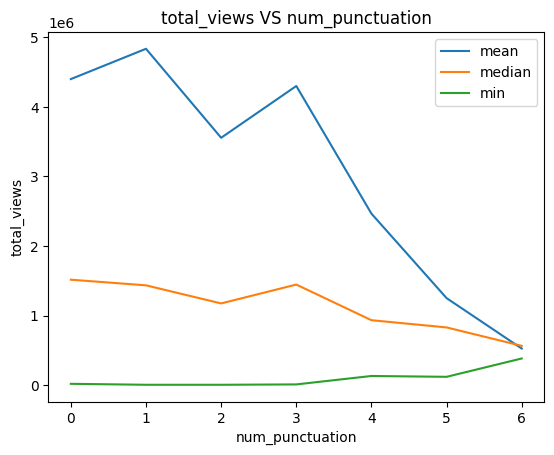

In [ ]:
from tables import group

# Plot the average, median, and minimum number of views a video gets per
# punctuation count

df_views_vs_punc = filtered_df[['total_views','num_punctuation']]
df_views_vs_punc = df_views_vs_punc.groupby('num_punctuation').agg(['mean','median','min'])
punc_agg_plot = df_views_vs_punc.plot(title = 'total_views VS num_punctuation', ylabel = 'total_views', )
punc_agg_plot.legend(['mean','median','min'])

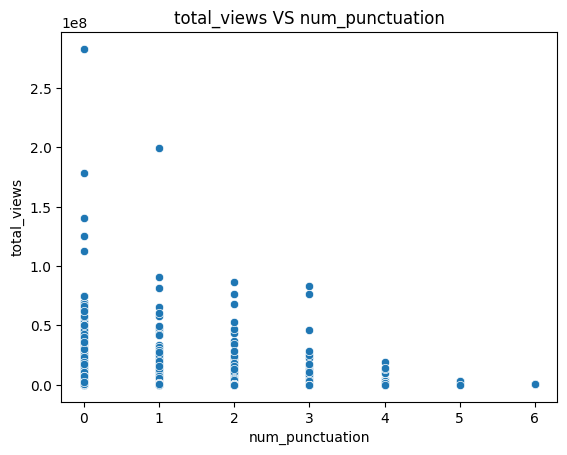

In [ ]:
# Scatter plot of number of views vs punctuation
scatter_views_vs_punc = sns.scatterplot(data = filtered_df,x = 'num_punctuation'
  ,y = 'total_views').set(title = 'total_views VS num_punctuation')

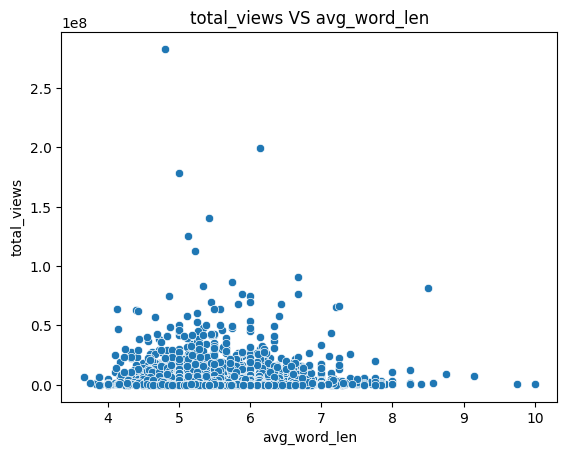

In [ ]:
# Scatter plot of number of views vs avg_word_len
scatter_views_vs_wrd_len = sns.scatterplot(data = filtered_df,x = 'avg_word_len'
  ,y = 'total_views').set(title = 'total_views VS avg_word_len')

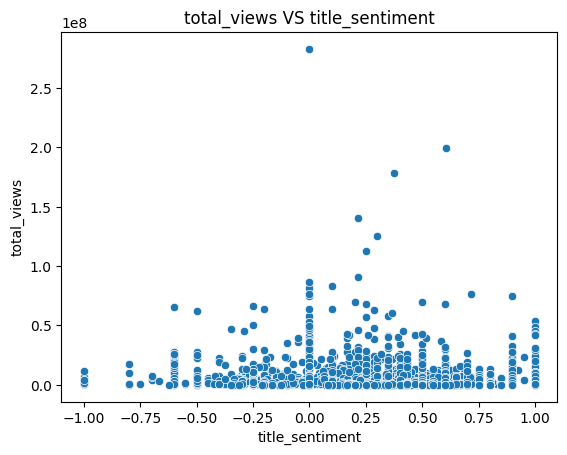

In [ ]:
# Scatter plot of number of views vs sentiment
scatter_views_vs_sentiment = sns.scatterplot(data = filtered_df,x = 'title_sentiment'
  ,y = filtered_df.total_views).set(title = 'total_views VS title_sentiment')

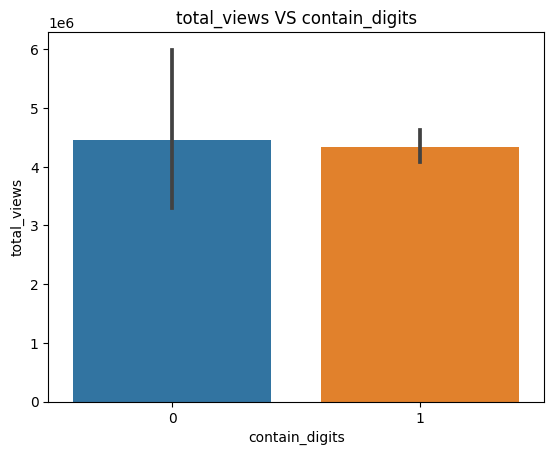

In [ ]:
# barplot plot of number of views vs contain_digits
bar_views_vs_wrd_len = sns.barplot(data = filtered_df,x = 'contain_digits'
  ,y = 'total_views').set(title = 'total_views VS contain_digits')

startswith_digits
1    4265
0     713
dtype: int64

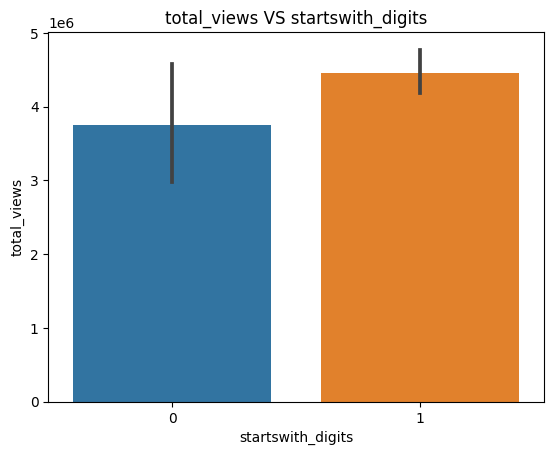

In [ ]:
# bar plot of number of views vs startswith_digits
bar_views_vs_wrd_len = sns.barplot(data = filtered_df,x = 'startswith_digits'
  ,y = 'total_views').set(title = 'total_views VS startswith_digits',)
filtered_df.value_counts('startswith_digits')

From this barplot, we can see that videos that start with digits perform better. However this may be due to there being 4265 videos that start with a digit compared to 713 videos that do not.

\To understand this further, we have to take the median, and average views a video that starts with digits gets compared to a video taht does not start with digits. The mean and the median are less reliant on value counts than simply counting the number of views in total.

In [ ]:
# make dataframe for videos that start with digits
digits = filtered_df[filtered_df['startswith_digits'] == 1]['total_views']

# make dataframe for videos that do not start with digits
no_digits = filtered_df[filtered_df['startswith_digits'] == 0]['total_views']
digits, no_digits

(5         90733
 6       1081439
 31       207931
 42      3076818
 57      3113351
          ...   
 4965      27110
 4969      46745
 4970      92880
 4976      93121
 4977     422671
 Name: total_views, Length: 4265, dtype: int64,
 0        295614
 1        130544
 2         17834
 3       3128867
 4       4210362
          ...   
 4971      38294
 4972     189370
 4973      76086
 4974      68908
 4975     118541
 Name: total_views, Length: 713, dtype: int64)

In [ ]:
#get mean of digits and no_digits
digits_mean = digits.mean()
no_digits_mean = no_digits.mean()
print(digits_mean, no_digits_mean)
#get median of digits and no_digits
digits_med = digits.median()
no_digits_med = no_digits.median()
print(digits_med, no_digits_med)

4450767.0201641265 3744576.3436185136
1545338.0 828683.0


The average number of views that a video with digits gets is substantially higher than the average views that a video that does not start with digits gets. The median for videos that start with digits is also much higher than videos that do not start with digits

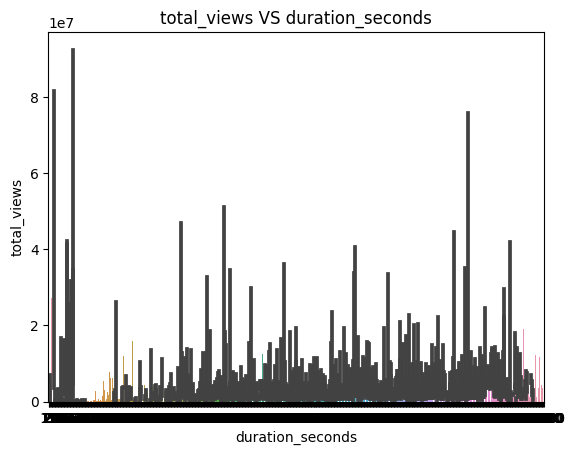

In [ ]:
# bar plot of number of views vs duration
bar_views_vs_duration = sns.barplot(data = filtered_df,x = 'duration_seconds'
  ,y = 'total_views').set(title = 'total_views VS duration_seconds')

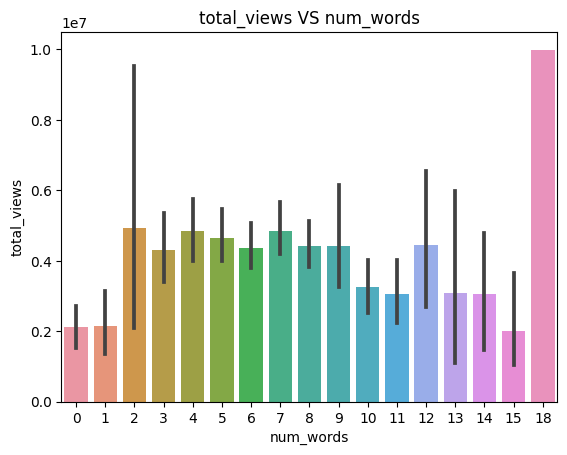

In [ ]:
# bar plot of number of views vs number of words
bar_views_vs_num_words = sns.barplot(data = filtered_df,x = 'num_words'
  ,y = 'total_views').set(title = 'total_views VS num_words')

## Below is a scatter matrix to quickly visualize if there are any interesting relationships between each of the variables.

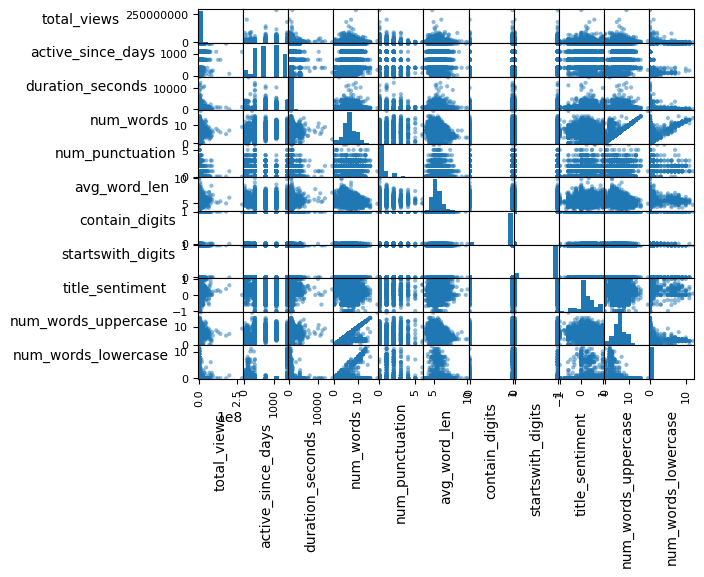

In [ ]:
fig = pd.plotting.scatter_matrix(df[['total_views', 'active_since_days', 'duration_seconds', 'num_words',
                  'num_punctuation', 'avg_word_len', 'contain_digits',
                  'startswith_digits', 'title_sentiment','num_words_uppercase', 'num_words_lowercase']])
for ax in fig.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

# EDA


OLS Regressions

In [ ]:
outcome_1,predictors_1 = patsy.dmatrices('total_views ~ num_words_lowercase',df)
mod_1 = sm.OLS(outcome_1,predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:            total_views   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     10.03
Date:                Fri, 04 Aug 2023   Prob (F-statistic):            0.00155
Time:                        10:49:57   Log-Likelihood:                -87262.
No. Observations:                4978   AIC:                         1.745e+05
Df Residuals:                    4976   BIC:                         1.745e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            4.444e+06   1

From the OLS Regression above, the P-value is less than the alpha 0.01. Therefore there is reason to reject the null hypothesis and infer that the number of lowercase words in the title effects the views ona given video.

In [ ]:
outcome_2,predictors_2 = patsy.dmatrices('total_views ~ duration_seconds',df)
mod_2 = sm.OLS(outcome_2,predictors_2)
res_2 = mod_2.fit()
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:            total_views   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     6.434
Date:                Fri, 04 Aug 2023   Prob (F-statistic):             0.0112
Time:                        15:00:55   Log-Likelihood:                -87264.
No. Observations:                4978   AIC:                         1.745e+05
Df Residuals:                    4976   BIC:                         1.745e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.892e+06   2.29e+05  

In [ ]:
outcome_3,predictors_3 = patsy.dmatrices('total_views ~ num_words',df)
mod_3 = sm.OLS(outcome_3,predictors_3)
res_3 = mod_3.fit()
print(res_3.summary())

                            OLS Regression Results                            
Dep. Variable:            total_views   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.05301
Date:                Fri, 04 Aug 2023   Prob (F-statistic):              0.818
Time:                        10:49:57   Log-Likelihood:                -87267.
No. Observations:                4978   AIC:                         1.745e+05
Df Residuals:                    4976   BIC:                         1.746e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.266e+06   3.88e+05     10.984      0.0

In [ ]:
outcome_4,predictors_4= patsy.dmatrices('total_views ~ title_sentiment',df)
mod_4 = sm.OLS(outcome_4,predictors_4)
res_4 = mod_4.fit()
print(res_4.summary())

                            OLS Regression Results                            
Dep. Variable:            total_views   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8647
Date:                Fri, 04 Aug 2023   Prob (F-statistic):              0.352
Time:                        10:49:57   Log-Likelihood:                -87267.
No. Observations:                4978   AIC:                         1.745e+05
Df Residuals:                    4976   BIC:                         1.746e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.428e+06   1.64e+05     

One way ANOVA tests

In [ ]:
model_1 = ols('total_views ~ duration_seconds', data=df).fit()
aov_table_1 = sm.stats.anova_lm(model_1, typ=2)
print(aov_table_1)

                        sum_sq      df         F    PR(>F)
duration_seconds  6.346289e+14     1.0  6.434104  0.011225
Residual          4.908086e+17  4976.0       NaN       NaN


In [ ]:
model_2 = ols('total_views ~ title_sentiment', data=df).fit()
aov_table_2 = sm.stats.anova_lm(model_2, typ=2)
print(aov_table_2)

                       sum_sq      df         F    PR(>F)
title_sentiment  8.538101e+13     1.0  0.864657  0.352484
Residual         4.913578e+17  4976.0       NaN       NaN


In [ ]:
model_3 = ols('total_views ~ num_words', data=df).fit()
aov_table_3 = sm.stats.anova_lm(model_3, typ=2)
print(aov_table_3)

                 sum_sq      df         F    PR(>F)
num_words  5.235157e+12     1.0  0.053008  0.817919
Residual   4.914379e+17  4976.0       NaN       NaN


Below is a scatter plot visualizing the number of views each of the diffrent counts of lowercase words has.

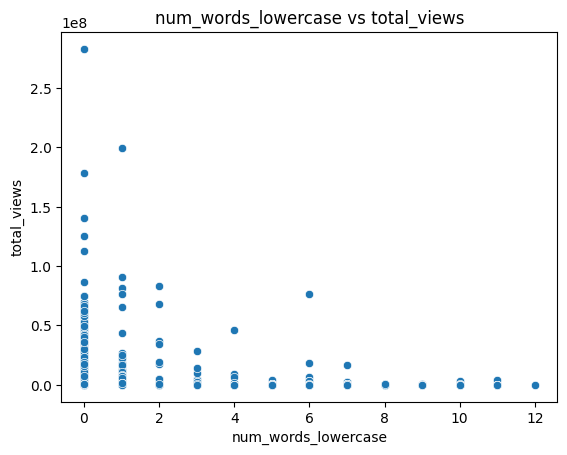

In [ ]:
scatter_lowercase = sns.scatterplot(data = df, x = 'num_words_lowercase', y = 'total_views').set(title='num_words_lowercase vs total_views')

## Number of Uppercase Words VS Lower Case Words

In [ ]:
#df of all videos where title is mostly upper case words
upper_g_lower_df = df[df['num_words_uppercase'] >= (df['num_words']-df['num_words_uppercase'])]['total_views']

#df of all videos where title is mostly not upper case words
lower_g_upper_df = df[df['num_words_uppercase'] < (df['num_words']-df['num_words_uppercase'])]['total_views']
upper_g_lower_df, lower_g_upper_df

(0        295614
 1        130544
 2         17834
 3       3128867
 4       4210362
          ...   
 4852       5648
 4853      12584
 4854      16766
 4859     472468
 4860    1220765
 Name: total_views, Length: 4774, dtype: int64,
 8        471701
 16       425344
 34       432458
 63      1159500
 68       594133
          ...   
 4973      76086
 4974      68908
 4975     118541
 4976      93121
 4977     422671
 Name: total_views, Length: 204, dtype: int64)

Below is a T-test to determine if there is a correlation in video views between titles with more upper case words vs lower case words.

In [ ]:
t_val, p_val = ttest_ind(upper_g_lower_df,lower_g_upper_df)
t_val, p_val

(3.4087290350443546, 0.000657845582623093)

Since the p_val is less than the alpha of 0.05, there is reason to reject the null hypothesis. Therefore there is a correlation between the number of uppercase words and the total number of views a video would get.

Below is the mean views that both a video with mostly upper case words would garner and the mean of what a title with mostly lower case words would garner.

In [ ]:
u_g_l_mean= upper_g_lower_df.mean()
u_g_l_med = upper_g_lower_df.median()
l_g_u_mean = lower_g_upper_df.mean()
l_g_u_med = lower_g_upper_df.median()
u_g_l_mean,l_g_u_mean,u_g_l_med,l_g_u_med

(4448754.61353163, 2029655.6323529412, 1525455.0, 115503.0)

A video title with mostly upper case words on average has more views than a title without mostly upper case words.The median of videos with mostly upper case words is also larger than those without mostly uppercase letters.

## Additional T-Tests

In [ ]:
t_stat, p_val = ttest_ind(df['total_views'], df['duration_seconds'])
print('T-statistic:', t_stat)
print('P-value:', p_val)

T-statistic: 30.87683190259959
P-value: 5.389391203221372e-200


In [ ]:
t_stat_2, p_val_2 = ttest_ind(df['total_views'], df['title_sentiment'])
print('T-statistic:', t_stat_2)
print('P-value:', p_val_2)

T-statistic: 30.883450822329046
P-value: 4.471450883996683e-200


In [ ]:
t_stat_3, p_val_3 = ttest_ind(df['total_views'], df['num_words'])
print('T-statistic:', t_stat_3)
print('P-value:', p_val_3)

T-statistic: 30.883406801527933
P-value: 4.477007580900055e-200
